<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-con-Python-001/blob/master/Regresi%C3%B3n_lineal_m%C3%BAltiple_para_la_detecci%C3%B3n_de_patrones_en_los_indicadores_de_rendimiento_clave_de_la_se%C3%B1al_LTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regresión lineal múltiple para la detección de patrones en los indicadores de rendimiento clave de la señal LTE**

Autor: MS.c. Ruben Quispe


# Introducción

Las redes celulares son uno de los pilares fundamentales de la comunicación a distancia en nuestro presente.
Las tecnologías de telecomunicaciones inalámbricas han ido evolucionando desde la comunicación más básica a través de conmutadores físicos hacia la comunicación de alta velocidad a través del espectro radioeléctrico.
Nuevas tecnologías también involucran nuevos desafios cada vez mas complejos en la resolución de problemas que afectan a la calidad de la señal. Por ello, uno de los problemas recurrentes que abordan los ingenieros de telecomunicaciones es la solución de problemas que afectan la red celular los cuales requieren un despliegue de distintas áreas y conocimientos para poder dar con el diagnóstico correcto de la falla en la red.
La ciencia de datos a permitido dar el paso hacia la siguiente evolución de las redes de telecomunicaciones siendo el 4G y 5G las tecnologías que utilizan procesamientos de datos masivos, análisis y desarrollo de soluciones automátizadas sin supervisión las que mejor se han beneficiado de estos avances teniendo al Big Data y Machine Learning como grandes aliados.
En este documento presentaré un breve uso de las herramientas de Machine Learning para la detección de patrones de los indicadores claves de señal de la red y posteriormente hacer un mejor diagnóstico para dar con las fallas recurrentes.

#Conceptos

En este documento me enfocaré en la red celular LTE.
Esta topología de red está compuesto de estaciones base las cuales se subdividen en celdas celulares.
Estas celdas se encargan de colectar datos de los usuarios móviles y tienen comunicación con celdas de estaciones vecinas asi como también con el nucleo de la red compuesto por servidores de alta escala.
La información recolectada sirve para tener estadisticas de los usuarios conectados a la red y con ello poder tomar decisiones sobre cuando y como traspasar la señal de un usuario que esta saliendo del rango de señal de una antena hacia otra. También para verificar la calidad de señal y entre muchos otros indicadores.
Uno de los indicadores claves de la señal se conoce como la accesibilidad el cual es una medición del porcentaje en el cual un usuario accede a la red celular.
Este indicador esta compuesto de submediciones las cuales se detallan a continuación:

**Call Setup Success Rate**: Este indicador especifica la tasa de éxito de establecimiento de llamadas para todos los servicios.

**E_RAB_Setup_Success_Rate_All**: Este indicador especifica la tasa de éxito de establecimiento de conexiónes E-RAB el cual es la comunicación que se da entre el usuario y el nucleo de red.

**E_RAB_Setup_Success_Rate_VOIP**: Este indicador especifica la tasa de éxito de establecimiento de conexiónes E-RAB el cual es la comunicación que se da entre el usuario y el nucleo de red para servicios de VoIP.

**RRC_CONNECTION_SETUP_SIGNALING**: Este indicador especifica la tasa de éxito de establecimiento de conexiónes RRC el cual es el envio de solicitudes del equipo móvil cuando quiere acceder a la red. Este contador se activa solamente cuando involucra mensajes de señalización.

**RRC_Setup_Success_Rate**:Este indicador especifica la tasa de éxito de establecimiento de conexiónes RRC el cual es el envio de solicitudes del equipo móvil cuando quiere acceder a la red. Este contador se activa solamente cuando involucra mensajes de acceso al servicio.

**S1SIG_Connection_Setup_Success_Rate**: Este indicador especifica la tasa de éxito de establecimiento de conexiónes de señalización entre la estación móvil y el núcleo de red.


# Recolección y preparación de datos

La muestra obtenida consta de 100 estaciones base LTE cuyo periodo de medición va desde el 13/11 05:00 hasta el 10/12 08:00 teniendo un total de 24000 filas y 6 columnas.

**Declaración de bibliotecas:**

In [1]:
import matplotlib.pyplot as plt                               # Biblioteca para la salida gráfica.
import statsmodels.formula.api as sfm                         # Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
import pandas as pd                                           # Biblioteca para manipulación de marcos de datos
from pandas.plotting import scatter_matrix                    # Herramienta de Pandas para diagramas de dispersión en matriz.
import numpy as np                                            # Biblioteca de funciones matemáticas.
from sklearn.feature_selection import SelectKBest, f_classif  # Herramienta para seleccionar características de acuerdo a las puntuaciones K más altas y para computar los F-valores ANOVA F-value para las muestras provistas.
from sklearn.feature_selection import RFE                     # Herramienta para clasificación de caracteristicas con eliminación de caracteristicas recursivas.
import seaborn as sns                                         # Biblioteca para hacer gráficos estadisticos en Python.
import statsmodels.formula.api as smf                         # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
from sklearn.model_selection import train_test_split          # Herramienta para dividir arrays o matrices dentro de entrenamiento aleatorio y subconjuntos de prueba.
from sklearn.linear_model import LinearRegression             # Herramienta para realizar regresión lineal por el método de mínimos cuadrados ordinarios.
from sklearn.metrics import mean_squared_error                # Herramienta para realizar la medición del error cuadrado medio.
from sklearn.metrics import mean_absolute_error               # Herramienta para realizar la medición del error absoluto medio.
from sklearn.model_selection import cross_val_score           # Herramienta para realizar una valoración por el método de validación cruzada.
from sklearn.svm import SVR                                   # Herramienta para realizar una regresión de vector soporte Epsilon.
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Obtención de dataset**

In [2]:
file = 'https://raw.githubusercontent.com/Elvis-Joel/Machine_learning/master/Accesibilidad.csv' # Guardamos la dirección web del dataset
df = pd.read_csv(file)                                                                          # Utilizamos la herramienta para leer un archivo csv y lo almacenamos en una variables
df.head(9)                                                                                      # Vemos las primeras 9 filas

,Start Time,Period(min),NE Name,Cell,Call Setup Success Rate,E_RAB_Setup_Success_Rate_All,E_RAB_Setup_Success_Rate_VOIP,RRC_CONNECTION_SETUP_SIGNALING,RRC_Setup_Success_Rate,S1SIG_Connection_Setup_Success_Rate
0,11/16/2020 19:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0
1,11/16/2020 21:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0
2,11/16/2020 22:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0
3,11/17/2020 1:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0
4,11/17/2020 7:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0
5,11/17/2020 8:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0
6,11/17/2020 10:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0
7,11/17/2020 11:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0
8,11/17/2020 12:00,60,LI015569_GORGOR,"eNodeB Function Name=4G_LI01556_GORGOR, Local ...",100.0,100.0,NaN,100.0,100.0,100.0


**Preparación de datos**

In [3]:
df_2 = df.iloc[:,[4,5,7,8,9]]             # Filtramos solo las columnas que nos interesan, en este caso no se está considerando la columna "E_RAB_Setup_Success_Rate_VOIP" puesto que posee en su mayoria valores nulos. 
data = df_2[~np.isnan(df_2).any(axis=1)]  # Eliminamos las filas donde existan valores nulos

# Análisis de datos

### Descripción de valores estadisticos

In [4]:
df_3 = data.apply(pd.to_numeric)    # Convertimos el dataset en valores numéricos
df_3.describe().transpose()         # Obtenemos la información estadística de nuestras 5 variables

,count,mean,std,min,25%,50%,75%,max
Call Setup Success Rate,22098.0,96.676519,11.814490,0.0,99.13,99.86,100.0,100.0
E_RAB_Setup_Success_Rate_All,22098.0,97.572351,10.318015,0.0,99.45,99.94,100.0,100.0
RRC_CONNECTION_SETUP_SIGNALING,22098.0,99.343239,3.476703,0.0,99.56,100.00,100.0,100.0
RRC_Setup_Success_Rate,22098.0,99.810904,2.542375,0.0,100.00,100.00,100.0,100.0
S1SIG_Connection_Setup_Success_Rate,22098.0,99.056242,5.250184,0.0,100.00,100.00,100.0,100.0


### Matriz de dispersión de nuestras variables

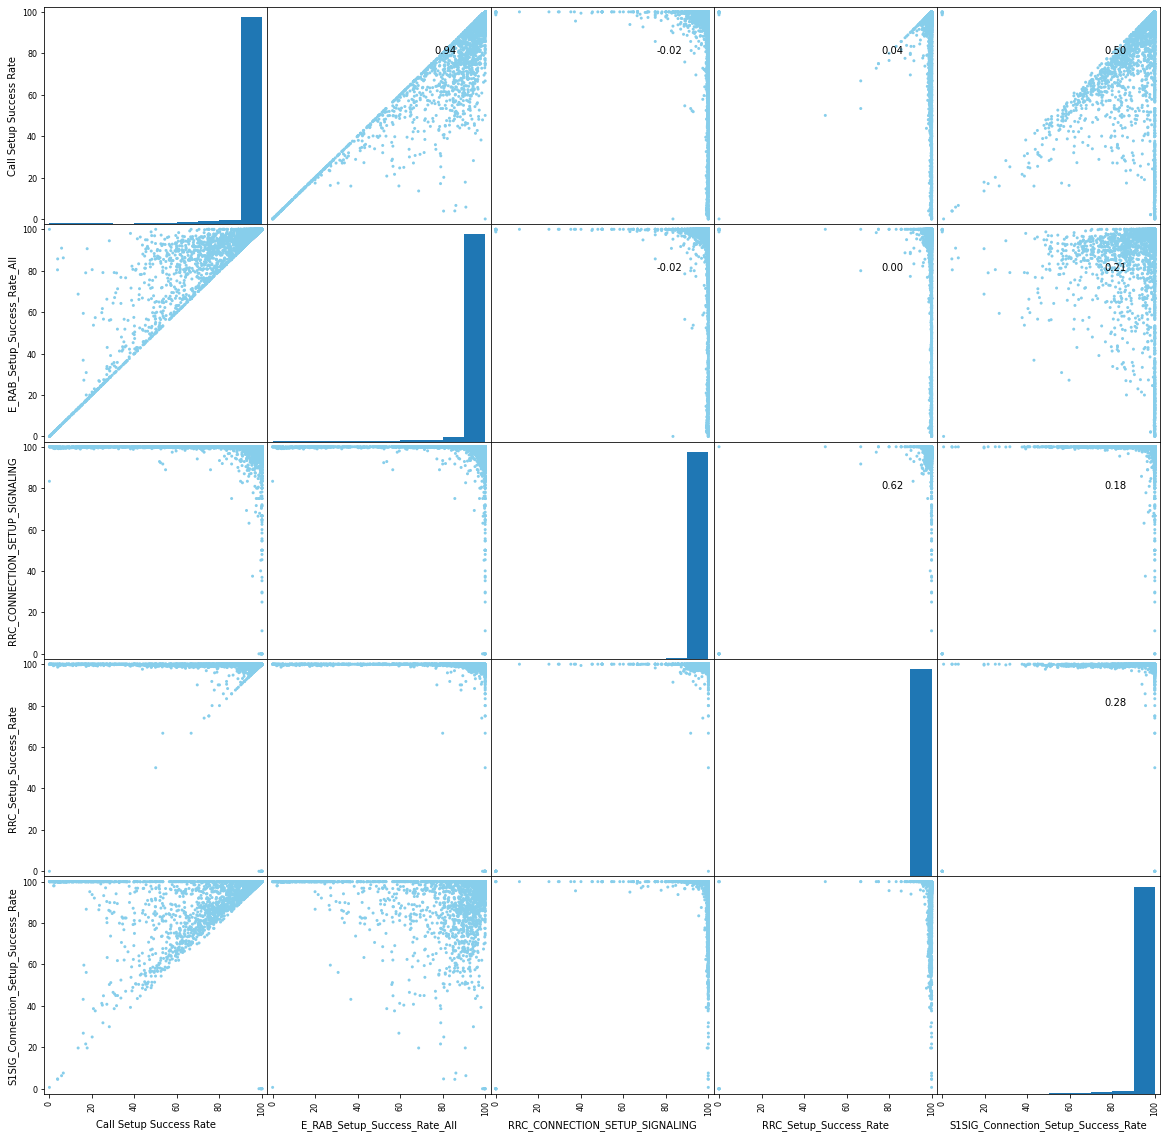

In [5]:
axes = scatter_matrix(df_3, alpha=1, figsize=(20,20), color="skyblue")  # Definimos color, tamaño y escala de los gráficos de dispersión.
corr = df_3.corr().values                                               # Definimos la función de correlación
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):                  # Definimos condicionales para encontrar la gráfica de correlación de cada una de las variables
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center') # 
plt.show()

Otra manera de visualizar mejor nuestra matriz de correlaciones es a través de un mapa de calor:

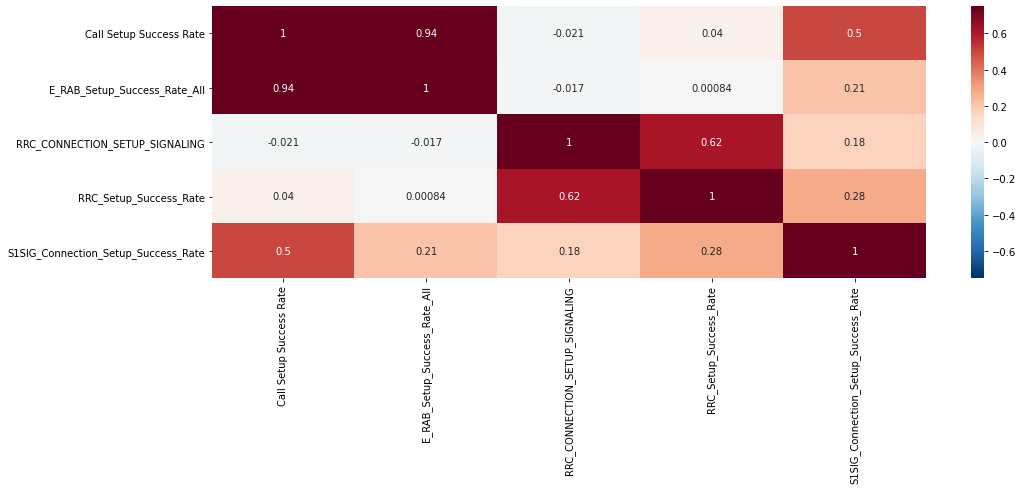

In [6]:
correlation = df_3.corr()
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-0.75, vmax=0.75, cmap="RdBu_r")

De la gráfica de dispersión de las variables se observa que existe un valor R2 alto entre la variable Call Setup Success Rate y la variable E-RAB success Rate All, sin embargo también encontramos una fuerte correlación respecto a otras variables.
A continuación realizaremos una mejor valorización de cada uno de los atributos para poder encontrar el modelo matemático que mejor se adapte a nuestra regresión lineal múltiple.
Nuestra variable dependiente o variable a predecir será el valor de Call Setup Success Rate y al resto de variables le llamaremos variables de entrada.

### Selección de atributos

En esta etapa se está probando solamente el indicador de calidad de Accesibilidad, sin embargo existen otros indicadores tales como Retinibilidad, mobilidad, integridad servicio, entre otros. A su vez, cada uno de estas caractéristicas posee atributos que en su totalidad vienen a ser variables independientes que hacen más complejo el modelo matemático. 
Para ello y para reducir dimensionalidades se utilizaran distintos metodos que nos ayudara a mejorar nuestro sistema predictivo. 

### Algoritmo univariante de prueba F

Existen 2 métodos de selección de atributos que nos ayudara a reducir la multidimensionalidad. Tenemos los algoritmos univariantes y algoritmos multivariantes, en este documento me enfocare solo en el primero.
El método de algoritmo univariante hace el análisis de cada atributos por separado, esto se realiza obteniendo el coeficiente de correlación y clasificandolo en un determinado conjunto de entrenamiento. Midiendo la información mutua de cada característica y las etiquetas de clasificación con el fin de maximizar esta información mutua o también aplicando test estadísticos de hipótesis sobre los datos como por ejemplo el t-statistic o chi-cuadrado.

In [7]:
Call_Success = df_3['Call Setup Success Rate']                          # Guardamos los atributos del dataset dentro de una variable dedicada.
E_RAB = df_3['E_RAB_Setup_Success_Rate_All']                            # Guardamos los atributos del dataset dentro de una variable dedicada.
RRC_SIGNALING = df_3['RRC_CONNECTION_SETUP_SIGNALING']                  # Guardamos los atributos del dataset dentro de una variable dedicada.
RRC_SETUP = df_3['RRC_Setup_Success_Rate']                              # Guardamos los atributos del dataset dentro de una variable dedicada.
S1_SETUP = df_3['S1SIG_Connection_Setup_Success_Rate']                  # Guardamos los atributos del dataset dentro de una variable dedicada.
k = 2  # número de atributos a seleccionar                              # Representamos el número de atributos que mejor se adapta a nuestro modelo matemático lineal múltiple.
entrenar = df_3.drop(['Call Setup Success Rate'], axis=1)               # Eliminamos nuestro atributo a predecir
columnas = list(entrenar.columns.values)                                # Guardamos en una lista los atributos que se usaran para el entrenamiento.
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, Call_Success) # Seleccionamos las características para nuestro entrenamiento y procedemos con la evaluación
atrib = seleccionadas.get_support()                                     # Almacenamos nuestros valores obtenidos
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]             # Utilizamos logica secuencial para almacenar los resultados obtenidos
atributos

['E_RAB_Setup_Success_Rate_All', 'S1SIG_Connection_Setup_Success_Rate']

Hicimos la prueba para seleccionar los 2 mejores atributos usando el método de algoritmos univariantes teniendo como resultado que las mejores variables que mejor se adaptan a nuestro modelo matemático son:['E_RAB_Setup_Success_Rate_All', 'S1SIG_Connection_Setup_Success_Rate'].
Si vemos en la gráfica de matriz de dispersión observamos que justamente estas dos variables son las que tienen mejor correlación con nuestro variables objetivo.
Sin embargo, necesitamos realizar más pruebas ya que aún no sabemos si existe correlación entre nuestras variables independientes lo cual puede causar ruido y afectar el modelo matemático de predicción. 

<function matplotlib.pyplot.show>

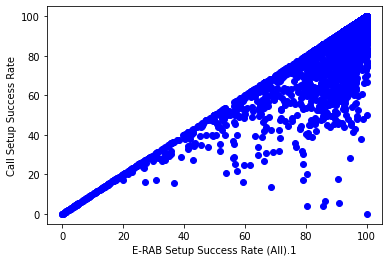

In [8]:
plt.scatter(E_RAB, Call_Success, color ='blue')
plt.xlabel("E-RAB Setup Success Rate (All).1")
plt.ylabel("Call Setup Success Rate")
plt.show
# Grafica de dispersión entre la variable objetivo "Call Setup Success Rate" y uno de los mejores atributos "E-RAB Setup Success Rate (All).1"

<function matplotlib.pyplot.show>

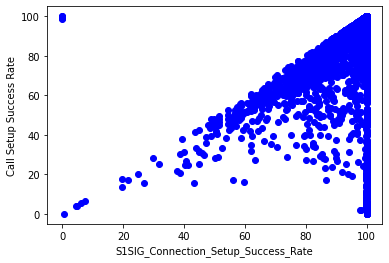

In [9]:
plt.scatter(S1_SETUP, Call_Success, color ='blue')
plt.xlabel("S1SIG_Connection_Setup_Success_Rate")
plt.ylabel("Call Setup Success Rate")
plt.show
# Grafica de dispersión entre la variable objetivo "Call Setup Success Rate" y uno de los mejores atributos "S1SIG_Connection_Setup_Success_Rate"

### Regresión Lineal Simple

Haremos un análisis más detallado de nuestro atributos para ver si existe colinealidad entre las variables dependientes y realizar un mejor ajuste lineal.

In [10]:

y = df_3['Call Setup Success Rate']                                     # Definimos variables dependientes
X = df_3.drop(['Call Setup Success Rate'], axis=1)                      # Definimos variables independientes o atributos
col_names = X.select_dtypes('float').columns                            # Probamos cada variable continua como una regresión lineal independiente
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]  # Obtenemos los valores de R2, intercepto, pendiente y valores-p para cada atributo
for idx, val in enumerate(col_names):                                   
    print ("Call setup succes rate~" + val)                             
    print ("------------------------------")

    f = 'Call_Success~' + val
    model = smf.ols(formula=f, data=df_3).fit()                       
    X_new = pd.DataFrame({val: [X[val].min(), X[val].max()]});
    preds = model.predict(X_new)                                      
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Call setup succes rate~E_RAB_Setup_Success_Rate_All
------------------------------
['E_RAB_Setup_Success_Rate_All', 0.875948150959455, -7.888116549574043, 1.071662558616753, 0.0]
Call setup succes rate~RRC_CONNECTION_SETUP_SIGNALING
------------------------------
['RRC_CONNECTION_SETUP_SIGNALING', 0.0004364812119388439, 103.72943190925527, -0.07099539760864615, 0.0018972551976009025]
Call setup succes rate~RRC_Setup_Success_Rate
------------------------------
['RRC_Setup_Success_Rate', 0.001611106564643916, 78.05927342521015, 0.18652516935857644, 2.389632916596848e-09]
Call setup succes rate~S1SIG_Connection_Setup_Success_Rate
------------------------------
['S1SIG_Connection_Setup_Success_Rate', 0.25332257011007675, -15.514805021531945, 1.132602269087682, 0.0]


Haciendo un análisis más detallado observamos que el valor R2 se acerca más a 1 con respecto al atributo "E_RAB_Setup_Success_Rate_All" (0.87), también existe una correlación leve respecto al atributo "S1SIG_Connection_Setup_Success_Rate" (0.25). Los demás valores son tan bajos que se podria decir que no guarda correlación alguna con nuestra variable dependiente.
Por otra parte, observamos el resultado del p-value el cual nos indica la probabilidad de tener resultados de prueba al menos tan extremos como los resultados observados bajo el supuesto que la hipótesis nula es correcta.
Un valor mayor al 5% no rechazará la hipótesis nula y por lo tanto no ayudara al sistema.
Los resultados de los atributos 'E_RAB_Setup_Success_Rate_All' y 'S1SIG_Connection_Setup_Success_Rate' muestran un p-value de 0, los cuales son buenos indicadores mientras que las demás variables muestran valores que exceden muy ligeramente los valores de los atributos mencionados.
Por último, se observa que existe correlación baja entre los atributos 'E_RAB_Setup_Success_Rate_All' y 'S1SIG_Connection_Setup_Success_Rate' lo cual es bueno ya que cuando se añada al modelo final no generará ruido y mejorará el valor R2.


A continuación realizaré un análisis más minucioso de los valores estadisticos de cada uno de los atributos utilizando el método de mínimos cuadrados ordinarios.

In [11]:
#Separating all dummy variables into their own categories.
cols_E_RAB_Setup = [col for col in X.columns if 'E_RAB_Setup_Success_Rate_All' in col]        # Separamos cara variable independiente dentro de sus propias características
cols_RRC_CONNECTION = [col for col in X.columns if 'RRC_CONNECTION_SETUP_SIGNALING' in col]   # Separamos cara variable independiente dentro de sus propias características
cols_RRC_Setup = [col for col in X.columns if 'RRC_Setup_Success_Rate' in col]                # Separamos cara variable independiente dentro de sus propias características
cols_S1SIG = [col for col in X.columns if 'S1SIG_Connection_Setup_Success_Rate' in col]       # Separamos cara variable independiente dentro de sus propias características
cols=[cols_E_RAB_Setup,cols_RRC_CONNECTION,cols_RRC_Setup,cols_S1SIG]                         # Almacenamos todas las variables independientes dentro de la variable cols

for col in cols:
    sum_cols = "+".join(col)
    f = "Call_Success ~" + sum_cols
    model = smf.ols(formula= f, data= df_3).fit()                                             # Ajustamos los valores de las variables independientes para realizar la regresión lineal
    print(model.summary())                                                                    # Imprimimos los resultados

                            OLS Regression Results                            
Dep. Variable:           Call_Success   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 1.560e+05
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:32:45   Log-Likelihood:                -62863.
No. Observations:               22098   AIC:                         1.257e+05
Df Residuals:                   22096   BIC:                         1.257e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

De acuerdo a los resultados al utilizar el método de mínimos ordinarios se obtiene que "RRC_CONNECTION_SETUP_SIGNALING" y "RRC_Setup_Success_Rate" poseen R cuadrado cercano a cero por lo tanto quedan descartados de ser parte del modelo matemático final, mientras que "S1SIG_Connection_Setup_Success_Rate" y "E_RAB_Setup_Success_Rate_All" poseen mejores valores de R cuadrado siendo la última mejor en correlación con la variable dependiente. También tienen un valor de p-value menor a 0.05.De todos modos hay que revisar si existe un grado de colinealidad entre cada una de las variables independientes por lo que se tendra que revisar con el método RFE. 

### Regresión Lineal Múltiple

Para esta etapa se usará un modelo utilizando una división de 20% para test y 80% para pruebas. Para probar el ajuste del modelo se mostrará su error absoluto medio, se comparará el error raiz cuadrada medio entre datos de entrenamiento y prueba, y se comparará la media de la variable dependiente actual y predecida.

In [12]:
y = df_3['Call Setup Success Rate']                                                                           # Definimos variables dependientes
X = df_3.drop(['Call Setup Success Rate'], axis=1)  # Eliminamos las variables que no aportan al modelo matemático final.

In [13]:
def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)                    # Utilizamos la libreria train_test_split y dividimos nuestros datos en 80% para entrenamiento y 20% para pruebas.
    reg = LinearRegression().fit(X_train, y_train)                                              # Utilizamos la libreria Linear regression y lo ajustamos de acuerdo a nuestra data de entrenamiento.
    y_hat = reg.predict(X_test)                                                                 # Predecimos el valor de la variable dependiente "Call success" de nuestra data de prueba.
    y_hat_train = reg.predict(X_train)                                                          # Predecimos el valor de la variable dependiente "Call success" de nuestra data de entrenamiento.
    print('R_squared Score:', reg.score(X, y))                                                  # Mostramos el valor R cuadrado de nuestro modelo lineal multiple.
    #Mostramos errores
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat))                           # Mostramos el error absoluto medio de la predicción de la data de prueba. 
    print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hat)))          # Mostramos el error raiz cuadrada medio de la predicción de la data de prueba.
    print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))  # Mostramos el error raiz cuadrada medio de la predicción de la data de entrenamiento.
    #Comparamos valores actuales y predecidos
    print('Mean Predicted Call Success Rate:', y_hat.mean())                                    # Mostramos el valor medio de la variable dependiente predecida.
    print('Mean Call Success Rate:', y_test.mean())                                             # Mostramos el valor medio de la variable dependiente de prueba.
    return LinearRegression
lin_reg(X,y)

R_squared Score: 0.9754040206520252
Mean Absolute Error: 0.5247194417452408
Root Mean Squared Error test: 2.460786675039484
Root Mean Squared Error train: 1.5996075720822132
Mean Predicted Call Success Rate: 96.74166147259443
Mean Call Success Rate: 96.736343891403


sklearn.linear_model._base.LinearRegression

Este modelo parece tener un gran ajuste. El valor R cuadrado es muy alto alrededor del 97.5%, la diferencia entre los distintos errores raiz cuadrados medios son cercanos a 0.72 y las tasas medias es de      0.02. Aunque parece ser un buen modelo es mejor probarlo usando validación cruzada.

In [14]:
def cross_validation(X, y):
    lm = LinearRegression()                               # Para realizar la validación cruzada utilizaremos la regresión lineal como estimador.
    score = cross_val_score(lm, X, y,cv=5, scoring="r2")  # Utilizaremos el valor fold-5
    print('R_squared Mean Score:',score.mean())           # Obtenemos el valor R cuadrado
    print(score)                                          # 
cross_validation(X,y)

R_squared Mean Score: 0.4343319711538582
[0.         0.         0.94605761 0.85050753 0.37509472]


El resultado de la validación cruzada fold-5 es terrible con una puntuación muy baja. Por lo tanto, el intercepto o la pendiente estan restringidos de modo que la linea de mejor ajuste encaja peor que una linea horizontal. Más aún, como se notó antes, podria ser un problema con dimensionalidad y probablemente varias de las variables ficticias no podrian contener mucha data. Sin embargo,se creará un nuevo modelo usando selección de atributos para remover las caracteristicas que estan causando ruido en el modelo inicial. 

###Eliminación de atributos recursivos (RFE)

In [15]:
estimator = SVR(kernel="linear")                                        # Utilizaremos la regresión de soporte vectorial      
selector = RFE(estimator, step=1)                                       # Utilizaremosla eliminación de atributos recursivos para remover atributos no significantes desde el modelo inicial.
selector = selector.fit(X, y)                                           # Ajustamos nuestro dataset al nuevo modelo 
X_RFE = X[X.columns[selector.support_]]                                 # Elegimos nuevas características del dataset conteniendo solamente caracteristicas a traves de la eliminacion de atributos recursivos
lin_reg(X_RFE, y)                                                       # Probamos el modelo

R_squared Score: 0.9716883576120794
Mean Absolute Error: 0.4610862198717865
Root Mean Squared Error test: 2.3440392638360024
Root Mean Squared Error train: 1.8539850775344509
Mean Predicted Call Success Rate: 96.4839682212418
Mean Call Success Rate: 96.51513665158386


sklearn.linear_model._base.LinearRegression

Aunque el R cuadrado cayó ligeramente a 97.1%, no es un gran cambio y se nota que las diferencias entre los errores de raiz cuadrado medios ha decrecido a 0.43 también como la diferencia entre los valores objeto actuales y predecidos ha sido reducido a 0.003. 

# Conclusión

- Es importante realizar un pre-procesamiento antes de tener los valores finales de entrada ya que en caso contrario generaran ruido en el modelo final y afectará el rendimiento. En este caso, el tipo de dataset hace que se tengan valores en muchos casos atipicos que inciden en el entrenamiento de datos, para solucionar ello filtré los valores que no aportaban al buen funcionamiento del sistema. Para ello es importante conocer bastante del tema antes de pre-procesar, en este caso conocer bastante el comportamiento de las redes de telecomunicaciones.
- La selección de atributos es un procedimiento muy importante a tomar en cuenta al momento de realizar un modelo predictivo, en este caso solamente se ha trabajado con cinco características para esta solución, sin embargo para posteriores predicciones se requiere trabajar con cientos de variables lo cual hace más complejo el sistema, de acuerdo a lo realizado en este documento, la eliminación de atributos recursivos resulta ser una herramienta bastante útil para trabajar con cantidades importantes de información.
- Existe una fuerte correlación entre la variable dependiente "Call sucess Rate" y la variable independiente "E_RAB_Setup_Success_Rate_All", por otra parte la variable independiente "S1SIG_Connection_Setup_Success_Rate" tiene correlación relativamente baja. Sin embargo al juntar estas 2 variables realizando regresión lineal múltiple se observa que el valor de correlación R cuadrado mejora notablemente por lo que se llega a la conclusión que seleccionando las variables correctas se puede llegar a predecir de una manera más confiable y ajustando el modelo matemático para encontrar patrones de manera más efectiva.
- Queda pendiente hacer las pruebas con los demás indicadores para observar el comportamiento y su incidencia en la señal LTE.